In [39]:
import pandas
import seaborn as sns
df = pandas.load('/Users/Gilles/Dropbox/Science/tdcs/data/all_data.pandas')
df['response regime'] = df['acc_spd'].map({'acc':'accuracy', 'spd':'speed'})

In [40]:
df.head()

,RT,acc_spd,accuracy,angle,block,coherence,dataset,id,left_right,subj_idx,tdcs,trial_NR,response regime
0,799,spd,1,180,1,0.4171,berkeley,S1.1,2,1,sham,1,speed
1,613,spd,1,180,1,0.4171,berkeley,S1.1,2,1,sham,2,speed
2,627,spd,1,180,1,0.4171,berkeley,S1.1,1,1,sham,3,speed
3,1280,acc,0,180,1,0.4171,berkeley,S1.1,1,1,sham,4,accuracy
4,800,spd,1,180,1,0.4171,berkeley,S1.1,2,1,sham,5,speed


In [41]:
df['block'] = np.ceil(df.trial_NR.div(150)).astype(int)
df.subj_idx = df.id.map(lambda x: x.split('.')[0])
df['RT'] = df['RT'] / 1000.

In [42]:
df.head()

,RT,acc_spd,accuracy,angle,block,coherence,dataset,id,left_right,subj_idx,tdcs,trial_NR,response regime
0,0.799,spd,1,180,1,0.4171,berkeley,S1.1,2,S1,sham,1,speed
1,0.613,spd,1,180,1,0.4171,berkeley,S1.1,2,S1,sham,2,speed
2,0.627,spd,1,180,1,0.4171,berkeley,S1.1,1,S1,sham,3,speed
3,1.280,acc,0,180,1,0.4171,berkeley,S1.1,1,S1,sham,4,accuracy
4,0.800,spd,1,180,1,0.4171,berkeley,S1.1,2,S1,sham,5,speed


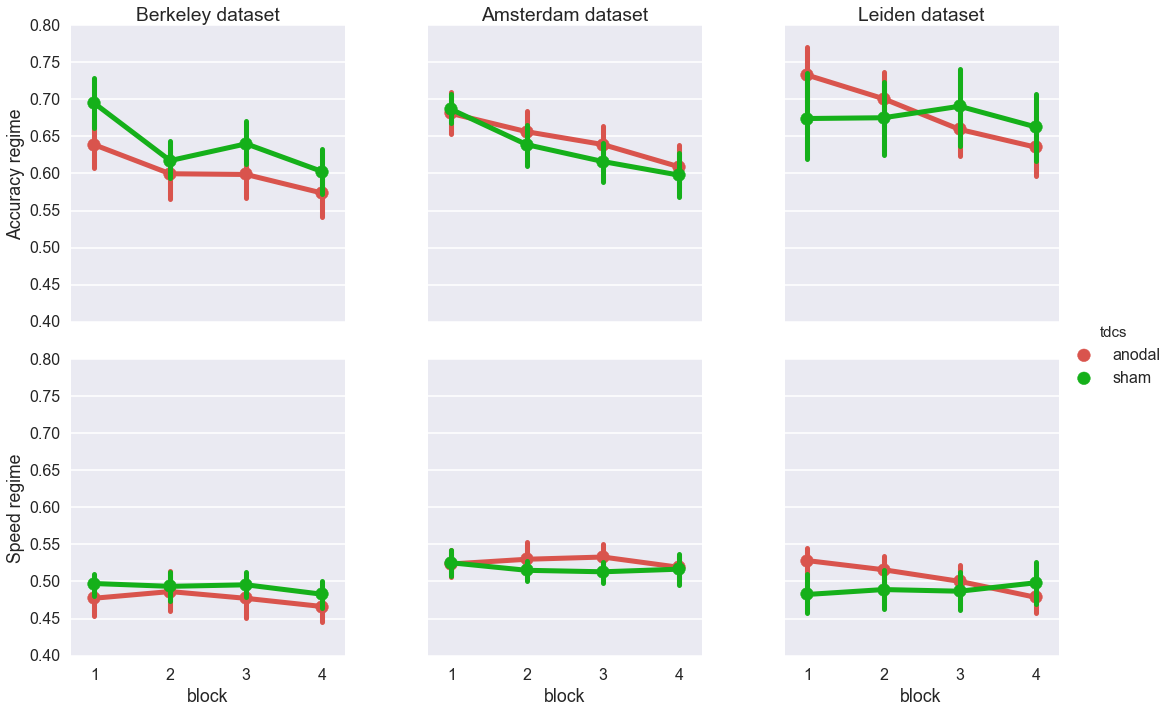

In [46]:
sns.set_context('poster')
sns.set_style('darkgrid')
sns.set_palette([sns.xkcd_rgb["pale red"], sns.xkcd_rgb["green"]])
f = sns.factorplot('block', 'RT', 'tdcs', df, col='dataset', row='response regime', units='subj_idx', col_order=['berkeley', 'amsterdam', 'leiden'], ci=67)

f.axes[0][0].set_ylabel('Accuracy regime')
f.axes[1][0].set_ylabel('Speed regime')

f.axes[0][0].set_title('Berkeley dataset')
f.axes[0][1].set_title('Amsterdam dataset')
f.axes[0][2].set_title('Leiden dataset')

f.axes[1][0].set_title('')
f.axes[1][1].set_title('')
f.axes[1][2].set_title('')

#plt.suptitle('Reaction times')

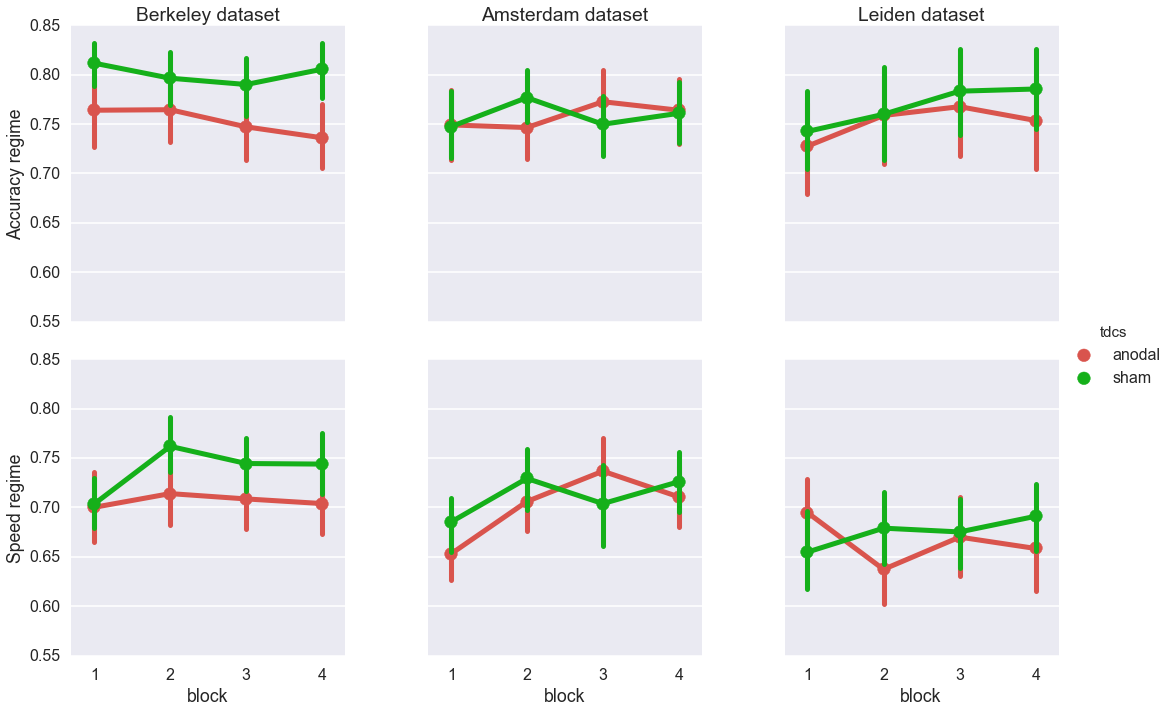

In [47]:
sns.set_context('poster')
sns.set_style('darkgrid')
sns.set_palette([sns.xkcd_rgb["pale red"], sns.xkcd_rgb["green"]])
f = sns.factorplot('block', 'accuracy', 'tdcs', df, col='dataset', row='response regime', units='subj_idx', col_order=['berkeley', 'amsterdam', 'leiden'], ci=67)

f.axes[0][0].set_ylabel('Accuracy regime')
f.axes[1][0].set_ylabel('Speed regime')

f.axes[0][0].set_title('Berkeley dataset')
f.axes[0][1].set_title('Amsterdam dataset')
f.axes[0][2].set_title('Leiden dataset')

f.axes[1][0].set_title('')
f.axes[1][1].set_title('')
f.axes[1][2].set_title('')

#plt.suptitle('Reaction times')

In [48]:
%load_ext rpy2.ipython

Error in library(vimcom) : there is no package called ‘vimcom’


In [61]:
df_berkeley = df[df.dataset == 'berkeley'].groupby(['subj_idx', 'acc_spd', 'tdcs', 'block'], as_index=False).mean()
df_berkeley.groupby(['acc_spd', 'tdcs']).size()
df_berkeley['block'] = df_berkeley['block'].astype(str, copy=False)

In [62]:
%%R -i df_berkeley

library("BayesFactor")

res = aov(RT ~ acc_spd*tdcs*block  + Error(subj_idx), data=df_berkeley)
print(summary(res))

names(res) = c("trt", "err")
res


bf = anovaBF(RT ~ acc_spd*tdcs*block, data=df_berkeley, whichRandom="subj_idx", whichModels="top")

print(bf)
print(1/bf)

#print(bf[1] / bf[4])
#print(bf[2] / bf[4])
#print(bf[4] / bf[3])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 14  1.561  0.1115               

Error: Within
                    Df Sum Sq Mean Sq F value  Pr(>F)    
acc_spd              1 1.0736  1.0736 209.620 < 2e-16 ***
tdcs                 1 0.0358  0.0358   6.993 0.00880 ** 
block                3 0.0634  0.0211   4.128 0.00718 ** 
acc_spd:tdcs         1 0.0083  0.0083   1.621 0.20434    
acc_spd:block        3 0.0351  0.0117   2.284 0.07997 .  
tdcs:block           3 0.0064  0.0021   0.418 0.74056    
acc_spd:tdcs:block   3 0.0018  0.0006   0.117 0.95005    
Residuals          210 1.0756  0.0051                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + block + acc_spd:tdcs + acc_spd:block + tdcs:block + acc_spd:tdcs:block , BF is...
[1] Omit acc_spd:block:tdcs : 10.67076  

In [64]:
df_berkeley['arcsine_accuracy'] = df_berkeley.accuracy.apply(np.arcsin)

In [65]:
%%R -i df_berkeley

library("BayesFactor")

res = aov(arcsine_accuracy ~ acc_spd*tdcs*block  + Error(subj_idx), data=df_berkeley)
print(summary(res))

names(res) = c("trt", "err")
res


bf = anovaBF(arcsine_accuracy ~ acc_spd*tdcs*block, data=df_berkeley, whichRandom="subj_idx", whichModels="top")

print(bf)
print(1/bf)

#print(bf[1] / bf[4])
#print(bf[2] / bf[4])
#print(bf[4] / bf[3])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 14  8.293  0.5923               

Error: Within
                    Df Sum Sq Mean Sq F value   Pr(>F)    
acc_spd              1 0.4537  0.4537  30.959 7.98e-08 ***
tdcs                 1 0.1492  0.1492  10.178  0.00164 ** 
block                3 0.0327  0.0109   0.743  0.52740    
acc_spd:tdcs         1 0.0125  0.0125   0.851  0.35721    
acc_spd:block        3 0.0657  0.0219   1.494  0.21723    
tdcs:block           3 0.0318  0.0106   0.723  0.53943    
acc_spd:tdcs:block   3 0.0078  0.0026   0.176  0.91237    
Residuals          210 3.0776  0.0147                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + block + acc_spd:tdcs + acc_spd:block + tdcs:block + acc_spd:tdcs:block , BF is...
[1] Omit acc_spd:block:tdcs : 1

## Amsterdam

In [68]:
df_amsterdam = df[df.dataset == 'amsterdam'].groupby(['subj_idx', 'acc_spd', 'tdcs', 'block'], as_index=False).mean()
df_amsterdam.groupby(['acc_spd', 'tdcs']).size()
df_amsterdam['block'] = df_amsterdam['block'].astype(str, copy=False)
df_amsterdam['arcsine_accuracy'] = df_amsterdam.accuracy.apply(np.arcsin)

In [71]:
%%R -i df_amsterdam

library("BayesFactor")

res = aov(RT ~ acc_spd*tdcs*block  + Error(subj_idx), data=df_amsterdam)
print(summary(res))

names(res) = c("trt", "err")
res


bf = anovaBF(RT ~ acc_spd*tdcs*block, data=df_amsterdam, whichRandom="subj_idx", whichModels="top")

print(bf)
print(1/bf)

#print(bf[1] / bf[4])
#print(bf[2] / bf[4])
#print(bf[4] / bf[3])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 14 0.8692 0.06208               

Error: Within
                    Df Sum Sq Mean Sq F value  Pr(>F)    
acc_spd              1 0.8195  0.8195 192.113 < 2e-16 ***
tdcs                 1 0.0059  0.0059   1.390 0.23981    
block                3 0.0604  0.0201   4.719 0.00329 ** 
acc_spd:tdcs         1 0.0001  0.0001   0.022 0.88319    
acc_spd:block        3 0.0388  0.0129   3.029 0.03040 *  
tdcs:block           3 0.0061  0.0020   0.479 0.69705    
acc_spd:tdcs:block   3 0.0005  0.0002   0.040 0.98925    
Residuals          210 0.8958  0.0043                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + block + acc_spd:tdcs + acc_spd:block + tdcs:block + acc_spd:tdcs:block , BF is...
[1] Omit acc_spd:block:tdcs : 10.1976   

In [72]:
%%R -i df_amsterdam

library("BayesFactor")

res = aov(arcsine_accuracy ~ acc_spd*tdcs*block  + Error(subj_idx), data=df_amsterdam)
print(summary(res))

names(res) = c("trt", "err")
res


bf = anovaBF(arcsine_accuracy ~ acc_spd*tdcs*block, data=df_amsterdam, whichRandom="subj_idx", whichModels="top")

print(bf)
print(1/bf)

#print(bf[1] / bf[4])
#print(bf[2] / bf[4])
#print(bf[4] / bf[3])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 14   5.21  0.3721               

Error: Within
                    Df Sum Sq Mean Sq F value   Pr(>F)    
acc_spd              1 0.3912  0.3912  38.195 3.28e-09 ***
tdcs                 1 0.0014  0.0014   0.132   0.7163    
block                3 0.0952  0.0317   3.099   0.0277 *  
acc_spd:tdcs         1 0.0047  0.0047   0.460   0.4985    
acc_spd:block        3 0.0459  0.0153   1.493   0.2174    
tdcs:block           3 0.0523  0.0174   1.702   0.1677    
acc_spd:tdcs:block   3 0.0068  0.0023   0.221   0.8817    
Residuals          210 2.1508  0.0102                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + block + acc_spd:tdcs + acc_spd:block + tdcs:block + acc_spd:tdcs:block , BF is...
[1] Omit acc_spd:block:tdcs : 1

## Leiden

In [73]:
df_leiden = df[df.dataset == 'leiden'].groupby(['subj_idx', 'acc_spd', 'tdcs', 'block'], as_index=False).mean()
df_leiden.groupby(['acc_spd', 'tdcs']).size()
df_leiden['block'] = df_leiden['block'].astype(str, copy=False)
df_leiden['arcsine_accuracy'] = df_leiden.accuracy.apply(np.arcsin)

In [74]:
%%R -i df_leiden

library("BayesFactor")

res = aov(RT ~ acc_spd*tdcs*block  + Error(subj_idx), data=df_leiden)
print(summary(res))

names(res) = c("trt", "err")
res


bf = anovaBF(RT ~ acc_spd*tdcs*block, data=df_leiden, whichRandom="subj_idx", whichModels="top")

print(bf)
print(1/bf)

#print(bf[1] / bf[4])
#print(bf[2] / bf[4])
#print(bf[4] / bf[3])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 13  2.323  0.1787               

Error: Within
                    Df Sum Sq Mean Sq F value Pr(>F)    
acc_spd              1 1.8043  1.8043 189.679 <2e-16 ***
tdcs                 1 0.0078  0.0078   0.819  0.367    
block                3 0.0386  0.0129   1.352  0.259    
acc_spd:tdcs         1 0.0007  0.0007   0.076  0.783    
acc_spd:block        3 0.0098  0.0033   0.344  0.793    
tdcs:block           3 0.0494  0.0165   1.731  0.162    
acc_spd:tdcs:block   3 0.0079  0.0026   0.278  0.841    
Residuals          195 1.8549  0.0095                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + block + acc_spd:tdcs + acc_spd:block + tdcs:block + acc_spd:tdcs:block , BF is...
[1] Omit acc_spd:block:tdcs : 9.638789     ±7.58%

In [75]:
%%R -i df_leiden

library("BayesFactor")

res = aov(arcsine_accuracy ~ acc_spd*tdcs*block  + Error(subj_idx), data=df_leiden)
print(summary(res))

names(res) = c("trt", "err")
res


bf = anovaBF(arcsine_accuracy ~ acc_spd*tdcs*block, data=df_leiden, whichRandom="subj_idx", whichModels="top")

print(bf)
print(1/bf)

#print(bf[1] / bf[4])
#print(bf[2] / bf[4])
#print(bf[4] / bf[3])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 13  9.874  0.7595               

Error: Within
                    Df Sum Sq Mean Sq F value   Pr(>F)    
acc_spd              1  1.487  1.4866  77.540 7.04e-16 ***
tdcs                 1  0.011  0.0107   0.559    0.455    
block                3  0.053  0.0176   0.919    0.433    
acc_spd:tdcs         1  0.001  0.0007   0.036    0.849    
acc_spd:block        3  0.043  0.0144   0.752    0.522    
tdcs:block           3  0.033  0.0110   0.572    0.634    
acc_spd:tdcs:block   3  0.013  0.0042   0.219    0.883    
Residuals          195  3.739  0.0192                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + block + acc_spd:tdcs + acc_spd:block + tdcs:block + acc_spd:tdcs:block , BF is...
[1] Omit acc_spd:block:tdcs : 9

## All

In [76]:
df_all = df.groupby(['subj_idx', 'acc_spd', 'tdcs', 'block'], as_index=False).mean()
df_all.groupby(['acc_spd', 'tdcs']).size()
df_all['block'] = df_leiden['block'].astype(str, copy=False)
df_all['arcsine_accuracy'] = df_all.accuracy.apply(np.arcsin)

In [77]:
%%R -i df_all

library("BayesFactor")

res = aov(RT ~ acc_spd*tdcs*block  + Error(subj_idx), data=df_all)
print(summary(res))

names(res) = c("trt", "err")
res


bf = anovaBF(RT ~ acc_spd*tdcs*block, data=df_all, whichRandom="subj_idx", whichModels="top")

print(bf)
print(1/bf)

#print(bf[1] / bf[4])
#print(bf[2] / bf[4])
#print(bf[4] / bf[3])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
block      1  0.035 0.03496     0.3  0.586
Residuals 42  4.886 0.11634               

Error: Within
                    Df Sum Sq Mean Sq F value Pr(>F)    
acc_spd              1  3.577   3.577 549.580 <2e-16 ***
tdcs                 1  0.000   0.000   0.038 0.8452    
block                3  0.052   0.017   2.653 0.0478 *  
acc_spd:tdcs         1  0.004   0.004   0.606 0.4366    
acc_spd:block        4  0.077   0.019   2.947 0.0197 *  
tdcs:block           4  0.011   0.003   0.424 0.7911    
acc_spd:tdcs:block   4  0.002   0.000   0.072 0.9906    
Residuals          642  4.178   0.007                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + block + acc_spd:tdcs + acc_spd:block + tdcs:block + acc_spd:tdcs:block , BF is...
[1] Om

In [78]:
%%R -i df_all

library("BayesFactor")

res = aov(arcsine_accuracy ~ acc_spd*tdcs*block  + Error(subj_idx), data=df_all)
print(summary(res))

names(res) = c("trt", "err")
res


bf = anovaBF(arcsine_accuracy ~ acc_spd*tdcs*block, data=df_all, whichRandom="subj_idx", whichModels="top")

print(bf)
print(1/bf)

#print(bf[1] / bf[4])
#print(bf[2] / bf[4])
#print(bf[4] / bf[3])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
block      1  0.375  0.3747   0.676  0.416
Residuals 42 23.280  0.5543               

Error: Within
                    Df Sum Sq Mean Sq F value Pr(>F)    
acc_spd              1  2.092  2.0916 141.160 <2e-16 ***
tdcs                 1  0.093  0.0933   6.295 0.0124 *  
block                3  0.094  0.0312   2.107 0.0982 .  
acc_spd:tdcs         1  0.002  0.0016   0.108 0.7425    
acc_spd:block        4  0.082  0.0206   1.390 0.2358    
tdcs:block           4  0.072  0.0179   1.208 0.3061    
acc_spd:tdcs:block   4  0.011  0.0026   0.178 0.9495    
Residuals          642  9.513  0.0148                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + block + acc_spd:tdcs + acc_spd:block + tdcs:block + acc_spd:tdcs:block , BF is...
[1] Om